<a href="https://colab.research.google.com/github/PW-5214/AI-Product-Development-/blob/main/AI%26PD_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving K8 Reviews v0.2.csv to K8 Reviews v0.2.csv
Saving samsung_customer_reviews.csv to samsung_customer_reviews.csv


In [2]:
import pandas as pd

apple_df = pd.read_csv("K8 Reviews v0.2.csv")
samsung_df = pd.read_csv("samsung_customer_reviews.csv")

print("APPLE DATASET")
print(apple_df.shape)
print(apple_df.columns)
print(apple_df.head(3))

print("\nSAMSUNG DATASET")
print(samsung_df.shape)
print(samsung_df.columns)
print(samsung_df.head(3))


APPLE DATASET
(14675, 2)
Index(['sentiment', 'review'], dtype='object')
   sentiment                                             review
0          1             Good but need updates and improvements
1          0  Worst mobile i have bought ever, Battery is dr...
2          1  when I will get my 10% cash back.... its alrea...

SAMSUNG DATASET
(1000, 6)
Index(['Review ID', 'Product Name', 'Review Text', 'Rating', 'Review Date',
       'Customer Name'],
      dtype='object')
  Review ID             Product Name                  Review Text  Rating  \
0     R0001    Samsung Galaxy Watch6     Love the camera quality!       1   
1     R0002          Samsung QLED TV  Highly recommend to others!       4   
2     R0003  Samsung Air Conditioner     Love the camera quality!       1   

  Review Date Customer Name  
0  2024-09-16    Jessica P.  
1  2023-01-29    Bradley B.  
2  2023-11-29    Suzanne M.  


In [3]:
import pandas as pd

apple_df = pd.read_csv("K8 Reviews v0.2.csv")
samsung_df = pd.read_csv("samsung_customer_reviews.csv")


In [4]:
apple_df = apple_df[["review", "sentiment"]]
apple_df["company"] = "Apple"

# Convert 0/1 to text labels
apple_df["sentiment"] = apple_df["sentiment"].map({0: "Negative", 1: "Positive"})


In [5]:
samsung_df = samsung_df[["Review Text", "Rating"]]
samsung_df.columns = ["review", "rating"]
samsung_df["company"] = "Samsung"

def rating_to_sentiment(r):
    return "Positive" if r >= 3 else "Negative"

samsung_df["sentiment"] = samsung_df["rating"].apply(rating_to_sentiment)
samsung_df = samsung_df[["review", "sentiment", "company"]]


In [6]:
df = pd.concat([apple_df, samsung_df], ignore_index=True)
df.head()


,review,sentiment,company
0,Good but need updates and improvements,Positive,Apple
1,"Worst mobile i have bought ever, Battery is dr...",Negative,Apple
2,when I will get my 10% cash back.... its alrea...,Positive,Apple
3,Good,Positive,Apple
4,The worst phone everThey have changed the last...,Negative,Apple


In [7]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df["clean_review"] = df["review"].apply(clean_text)


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=5000
)

X = tfidf.fit_transform(df["clean_review"])
y = df["sentiment"]


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.83      0.86      0.85      2412
    Positive       0.85      0.81      0.83      2291

    accuracy                           0.84      4703
   macro avg       0.84      0.84      0.84      4703
weighted avg       0.84      0.84      0.84      4703



In [10]:
df["predicted_sentiment"] = model.predict(X)

comparison = pd.crosstab(
    df["company"],
    df["predicted_sentiment"],
    normalize="index"
) * 100

comparison


predicted_sentiment,Negative,Positive
company,,
Apple,55.672913,44.327087
Samsung,24.500000,75.500000


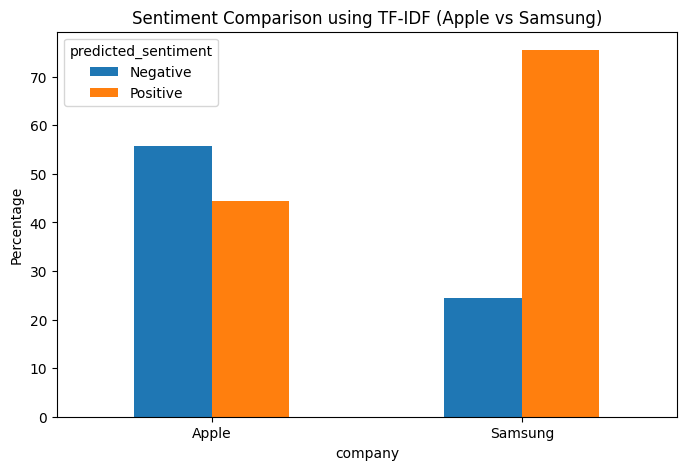

In [11]:
import matplotlib.pyplot as plt

comparison.plot(kind="bar", figsize=(8,5))
plt.title("Sentiment Comparison using TF-IDF (Apple vs Samsung)")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()
